In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,48.733230,12.033690,10.572053,11.623881,20.838207
1,32.916153,3.259484,9.202702,-3.890795,18.175394
2,44.540258,1.667703,12.017809,19.462190,23.781025
3,57.632425,3.442336,11.238726,-0.429425,23.098739
4,49.189078,19.636671,13.530194,12.947777,22.423968


<AxesSubplot:ylabel='Density'>

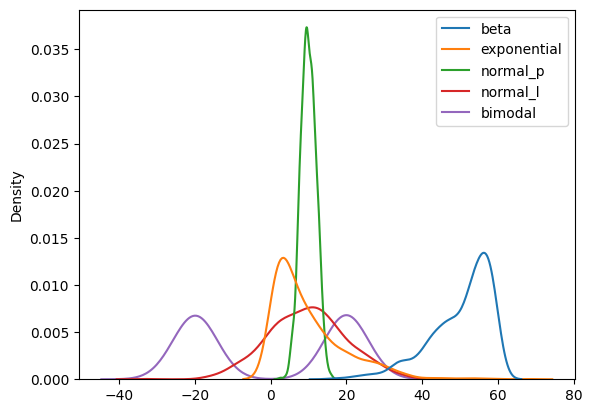

In [5]:
#Trực quan hóa dữ liệu sinh ra
sns.kdeplot(data=df)


In [6]:
# Hiển thị thống kê về dữ liệu sinh ra
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.205384,10.037592,9.964003,9.680532,0.044538
std,8.170109,9.548920,2.034479,10.244321,20.215784
min,16.492804,0.005652,2.574015,-32.894527,-29.443789
25%,45.674469,2.877526,8.599698,2.719187,-19.922330
50%,52.816155,6.915229,9.899440,9.719058,0.091563
75%,56.600985,13.998744,11.350977,16.453838,19.989480
max,59.992363,67.128031,16.137468,39.961481,30.895631


<AxesSubplot:ylabel='Density'>

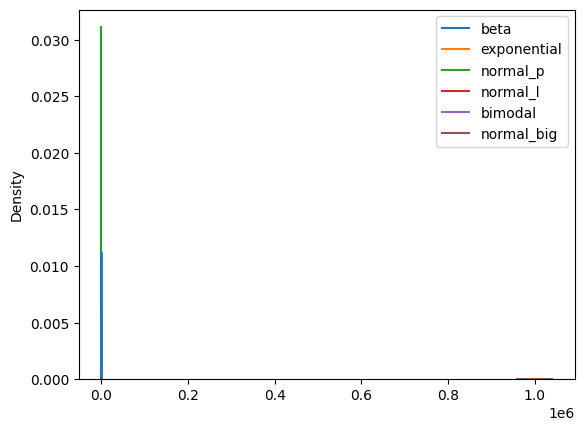

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

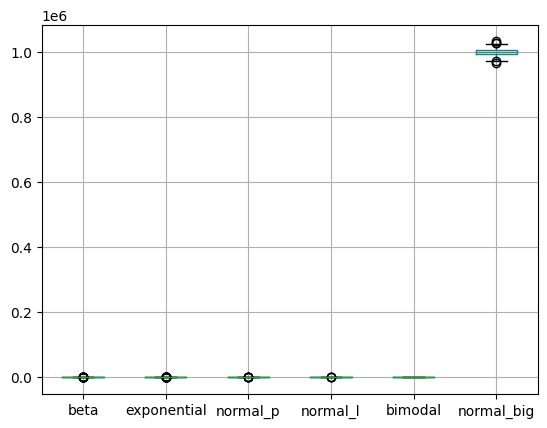

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [9]:
#Chuẩn hóa với StandardScaler (Z-Score scaling)
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)
# lấy danh sáchc cột
col_names = list(df.columns)
# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-0.180278,0.209144,0.299022,0.189795,1.029101,-0.591384
1,-2.117216,-0.710185,-0.374386,-1.325429,0.897315,-0.557357
2,-0.693744,-0.876966,1.010005,0.955315,1.174744,-1.597535
3,0.909505,-0.691026,0.626873,-0.987378,1.140977,-0.369635
4,-0.124455,1.005756,1.753754,0.319092,1.107582,0.970063


<AxesSubplot:ylabel='Density'>

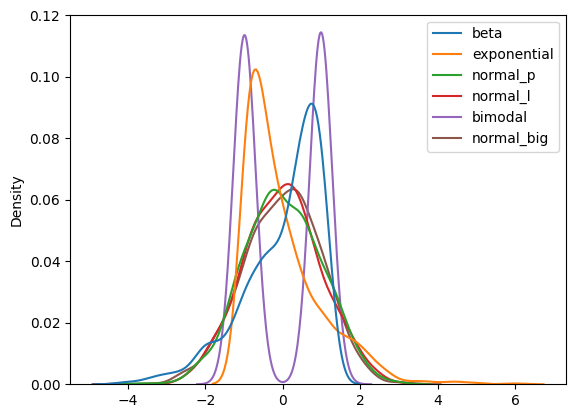

In [10]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [11]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,1.207923e-16,-9.059420e-17,4.263256e-17,4.263256e-17,0.000000,-1.311307e-14
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500,1.000500e+00
min,-4.128396e+00,-1.051109e+00,-3.634190e+00,-4.158047e+00,-1.459408,-3.452620e+00
25%,-5.548497e-01,-7.502051e-01,-6.709268e-01,-6.798722e-01,-0.988181,-6.848180e-01
50%,3.197115e-01,-3.271496e-01,-3.174989e-02,3.762590e-03,0.002327,3.959945e-02
75%,7.831966e-01,4.150348e-01,6.820755e-01,6.615075e-01,0.987096,7.001476e-01
max,1.198500e+00,5.981724e+00,3.035939e+00,2.957356e+00,1.526853,3.320115e+00


<AxesSubplot:>

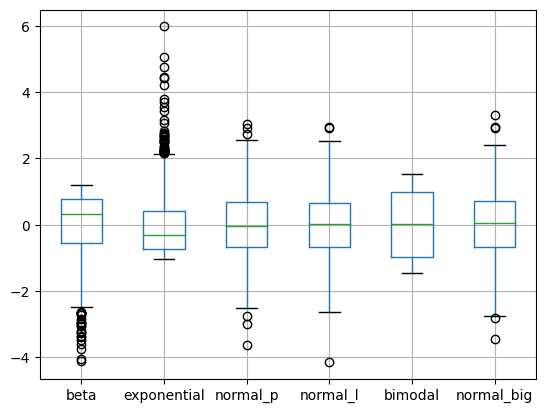

In [12]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()